### Import libraries


let's start importing the libraries:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings("ignore")


### Import DataFrame

and the database:

In [2]:
df=pd.read_csv(r"kickstarter_projects.csv")

### Preliminary Analysis

preliminar look at the database, top rows:

In [4]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


object type of each column:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


Change dtype from object to datetime

In [3]:
df['Launched']=pd.to_datetime(df['Launched'], format='%Y-%m-%d %H:%M:%S')
df['Deadline']=pd.to_datetime(df['Deadline'], format='%Y-%m-%d')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [34]:
df["Deadline"]=pd.to_datetime(df["Deadline"], format='%Y-%m-%d')

number of rows and columns:

In [56]:
df.shape

(374853, 11)

let's extract the list of columns:

In [57]:
df.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State'],
      dtype='object')

general statistics of each numerical variable  in the database:

In [58]:
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


analysis of Nan values across the database:

presence of Nan in each column (there are no Nan value in the database)

In [59]:
df.isna().any()

ID             False
Name           False
Category       False
Subcategory    False
Country        False
Launched       False
Deadline       False
Goal           False
Pledged        False
Backers        False
State          False
dtype: bool

Check duplicate rows: no duplicates

In [5]:
df[df.duplicated()]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State


### Step 1: Transforming DataFrame

In [3]:
print("Unique number of names: "+str(df['Name'].nunique()))
print("Unique number of categories: "+str(df['Category'].nunique()))
print("Unique number of subcategories: "+str(df['Subcategory'].nunique()))
print("Unique number of countries: "+str(df['Country'].nunique()))

Unique number of names: 372061
Unique number of categories: 15
Unique number of subcategories: 159
Unique number of countries: 22


Plot total number of products for each category: film and video is the most popular category

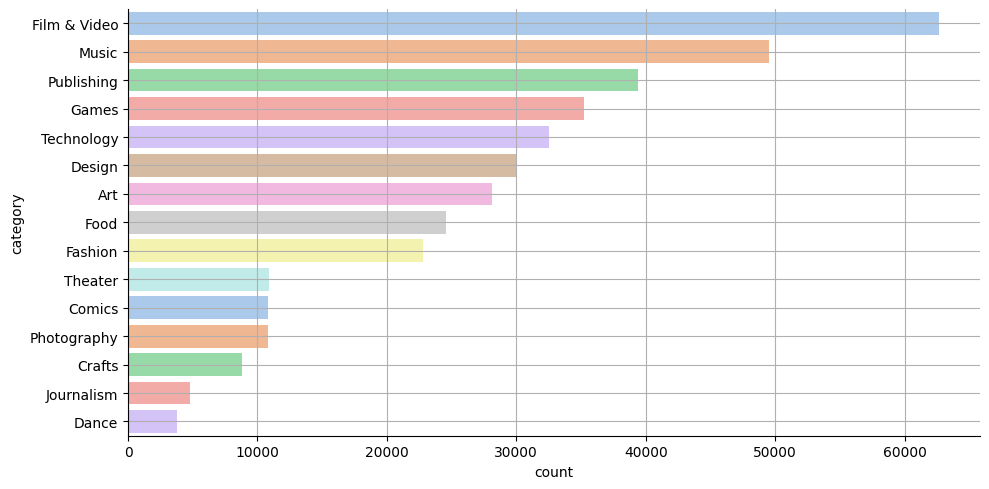

In [36]:
data=pd.DataFrame({'index':df["Category"].value_counts().index, 'values':df["Category"].value_counts().values})
sns.catplot(data=data, x=data['values'], y=data['index'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("count")
plt.ylabel("category")
plt.show()

Do the same for the top 10 subcategories: product design is the most popular subcategory

Explore the top 5 products based on the total pledged

In [69]:
df.groupby("Name")["Pledged"].sum().sort_values(ascending=False).head(5)

Name
Pebble Time - Awesome Smartwatch, No Compromises              20338986
COOLEST COOLER: 21st Century Cooler that's Actually Cooler    13285226
Pebble 2, Time 2 + All-New Pebble Core                        12779843
Kingdom Death: Monster 1.5                                    12393140
Pebble: E-Paper Watch for iPhone and Android                  10266846
Name: Pledged, dtype: int64

Plot using the seaborn library

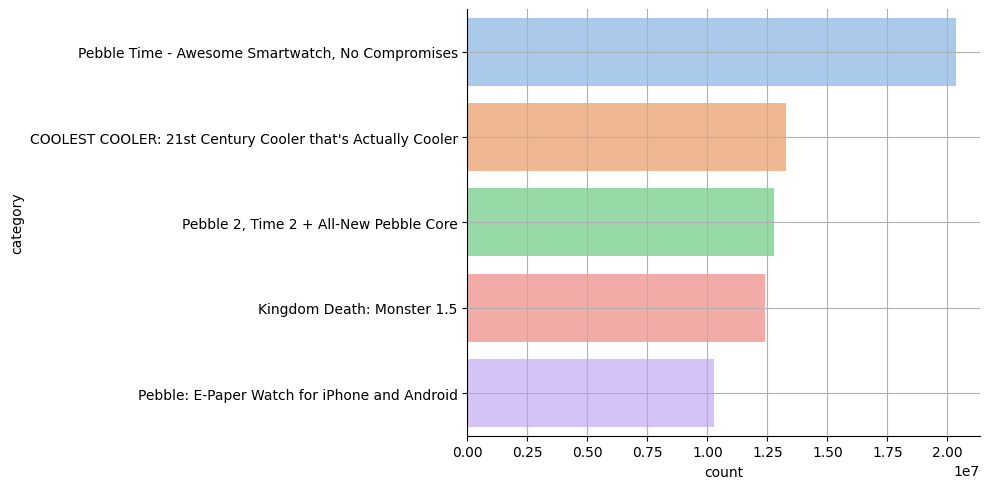

In [26]:
data=pd.DataFrame({'index':df.groupby("Name")["Pledged"].sum().sort_values(ascending=False).head(5).index,
                    'values':df.groupby("Name")["Pledged"].sum().sort_values(ascending=False).head(5).values})

sns.catplot(data=data, x=data['values'], y=data['index'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("count")
plt.ylabel("category")
plt.show()


Let's compare the goal and total pledged of the top10 products with higher pledging: we see that the set goals were significantly surpassed by the pledged sums

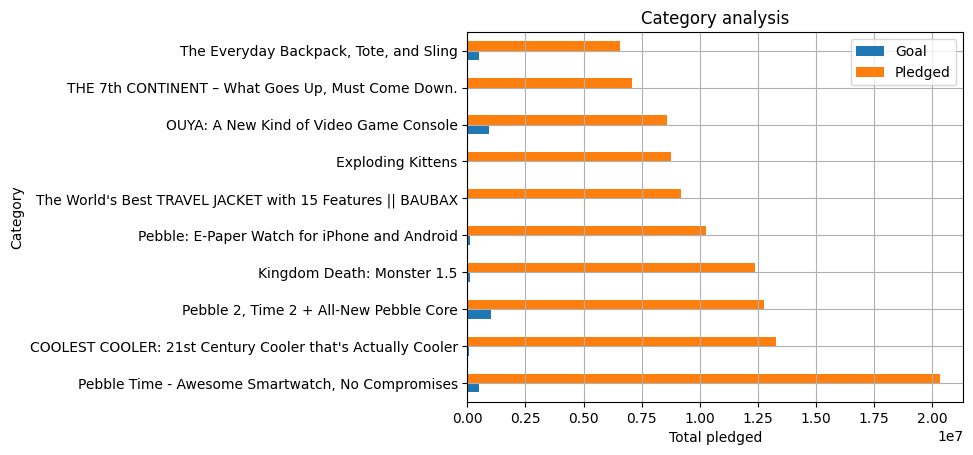

In [24]:
df.groupby("Name")[["Goal","Pledged"]].sum().sort_values("Pledged",ascending=False).head(10).plot(kind="barh")
plt.xlabel("Total pledged")
plt.ylabel("Category")
plt.title("Category analysis")
plt.grid()
plt.show()

Let's compare mean goals and mean pledged sums based on the category: statistically a product receives more money when classified as design product, follows by technology and games. There's also a better proportion between pledged sum and goal for the design products, compared to technology and games.

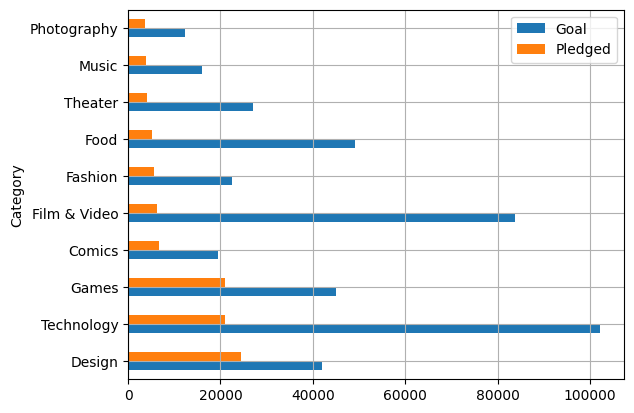

In [20]:
df.groupby("Category")[["Goal","Pledged"]].agg({"Goal":"mean","Pledged":"mean"}).sort_values("Pledged",ascending=False).head(10).plot(kind="barh")
plt.grid()
plt.show()

Plot the distribution of backers: most products feature a total number of backers between 0 and 60

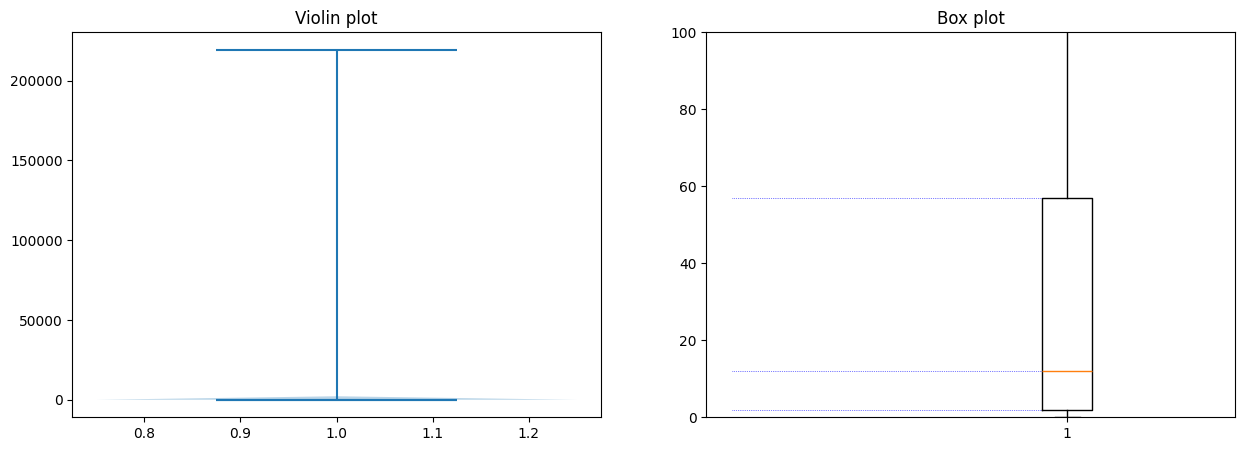

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].violinplot(df["Backers"],
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

axs[1].boxplot(df["Backers"])
axs[1].set_title('Box plot')
axs[1].set_ylim([0, 100])

quantiles = np.quantile(df["Backers"], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
axs[1].hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)

Calculate the total pledged values based on the country, and sort them in descending order

In [11]:
df.groupby("Country")["Pledged"].sum().sort_values(ascending=False)

Country
United States     2829760262
United Kingdom     236587184
Canada              91793533
Australia           46737242
Germany             39776273
France              34357482
Netherlands         29245075
Italy               16386010
Sweden              13415840
Switzerland         13055106
Spain               12947660
Hong Kong           10029485
Austria              9665787
New Zealand          7821521
Denmark              7583273
Singapore            5847533
Ireland              4187257
Belgium              4181551
Norway               2668762
Mexico               2430071
Luxembourg            468676
Japan                 115889
Name: Pledged, dtype: int64

The following plot clearly show that the United States leads the group, followed by the United Kingdom

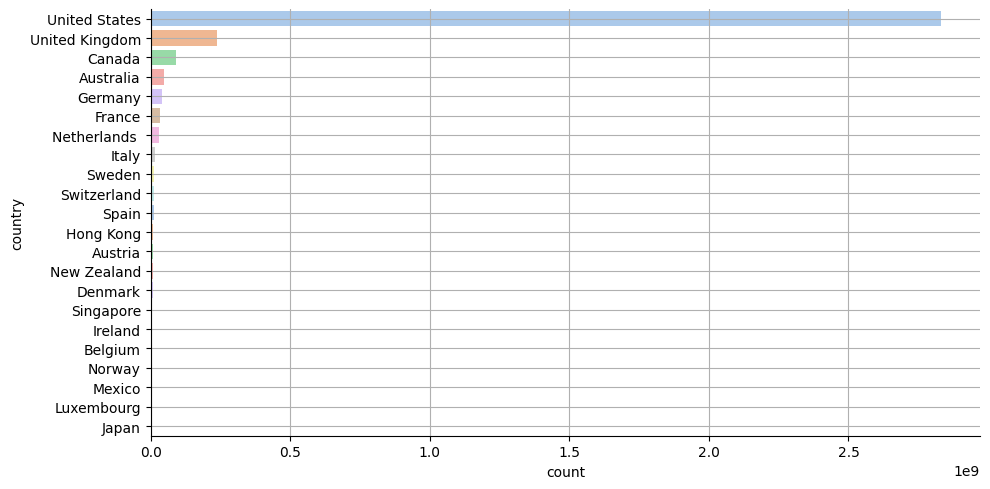

In [28]:
data=pd.DataFrame({'index':df.groupby("Country")["Pledged"].sum().sort_values(ascending=False).index,
                    'values':df.groupby("Country")["Pledged"].sum().sort_values(ascending=False).values})

sns.catplot(data=data, x=data['values'], y=data['index'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("count")
plt.ylabel("country")
plt.show()

Calculate the total pledged values based on the category, and sort them in descending order

In [4]:
df.groupby("Category")["Pledged"].sum().sort_values(ascending=False)


Category
Games           741272909
Design          734206652
Technology      686093471
Film & Video    389856311
Music           193739169
Publishing      133520181
Fashion         130321926
Food            125806330
Art              90680287
Comics           71518460
Theater          43714025
Photography      38501455
Crafts           14384311
Dance            13010507
Journalism       12435478
Name: Pledged, dtype: int64

The following plot shows that the most requested categories are games, design and technology

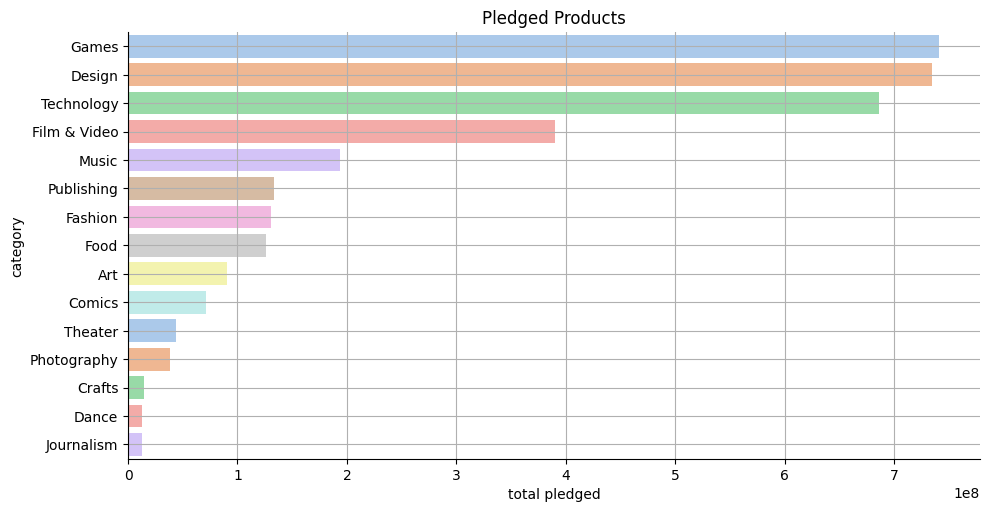

In [33]:
data=pd.DataFrame({'index':df.groupby("Category")["Pledged"].sum().sort_values(ascending=False).index,
                    'values':df.groupby("Category")["Pledged"].sum().sort_values(ascending=False).values})

sns.catplot(data=data, x=data['values'], y=data['index'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("total pledged")
plt.ylabel("category")
plt.title("Pledged Products")
plt.show()

From the following histogram chart we see that increasing the goal the number of products rapidly decreases. Most games have a goal set between 0 and 5000 dollars

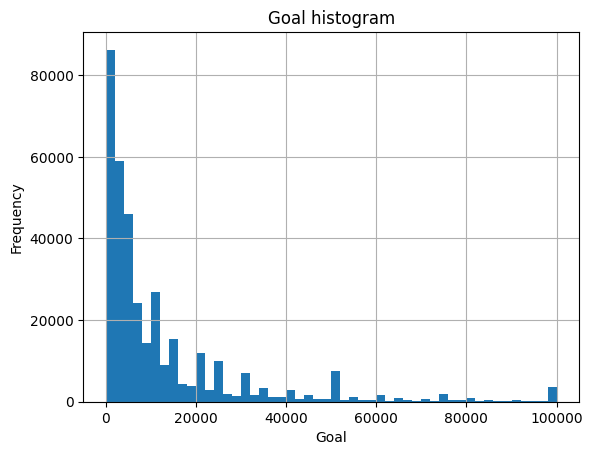

In [63]:
plt.hist(df["Goal"],range=[0, 100000],bins=50)
plt.grid()
plt.xlabel("Goal")
plt.ylabel("Frequency")
plt.title("Goal histogram")
plt.show()

The following graph shows how most products have total pledged lower than 2500 dollars

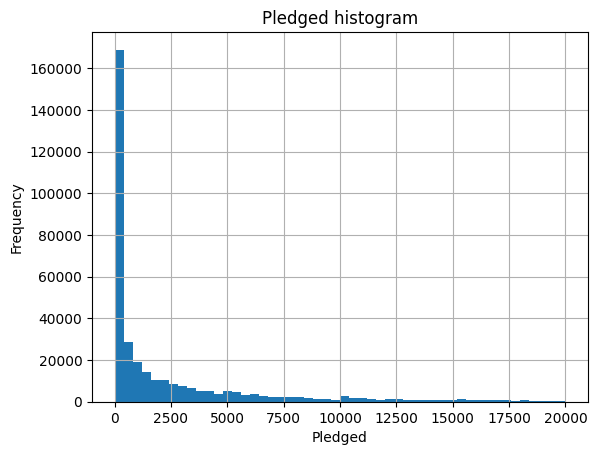

In [36]:
plt.hist(df["Pledged"],range=[0, 20000],bins=50)
plt.grid()
plt.xlabel("Pledged")
plt.ylabel("Frequency")
plt.title("Pledged histogram")
plt.show()

Let's calculate the total number of pledged dollars based on the product state (successfull, failed, cancelled, suspended and live )

In [17]:
df.groupby("State")["Pledged"].sum().sort_values(ascending=False)

State
Successful    3033664952
Failed         261064966
Canceled        90731198
Suspended       17172572
Live            16427784
Name: Pledged, dtype: int64

It's clear from the following chart that almost all of the pledged money went to successful products

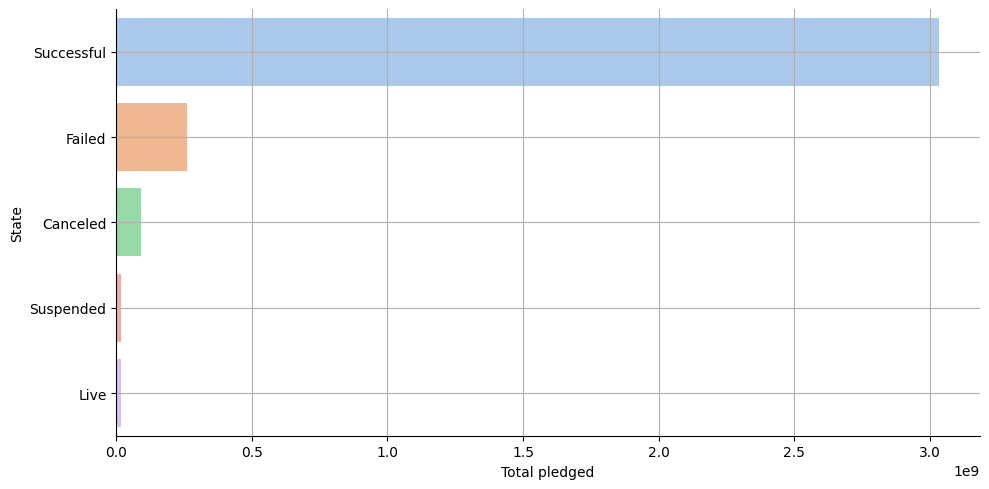

In [32]:
data=pd.DataFrame({'index':df.groupby("State")["Pledged"].sum().sort_values(ascending=False).index,
                    'values':df.groupby("State")["Pledged"].sum().sort_values(ascending=False).values})

sns.catplot(data=data, x=data['values'], y=data['index'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("Total pledged")
plt.ylabel("State")
plt.show()

Let's analyse the temporal distribution of backers: 2015 registered the higher frequency of backers, followed by 2016 an 2017

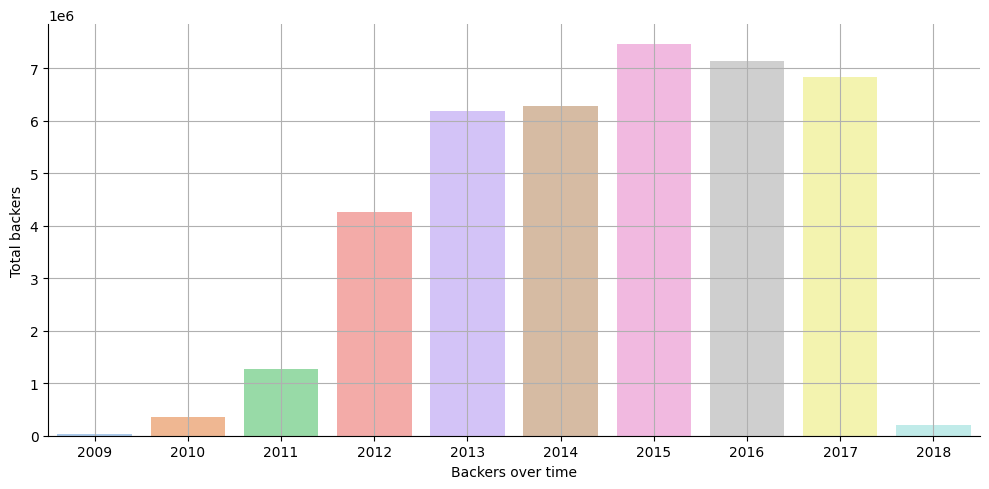

In [40]:
data=pd.DataFrame({'index':df.groupby(df.Deadline.dt.year)["Backers"].sum().index,
                    'values':df.groupby(df.Deadline.dt.year)["Backers"].sum().values})

sns.catplot(data=data, x=data['index'], y=data['values'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("Backers over time")
plt.ylabel("Total backers")
plt.show()

Let's focus on successfull games (goal<pledged): the following graph shows that the chance for the game to be cancelled or suspended is very limited

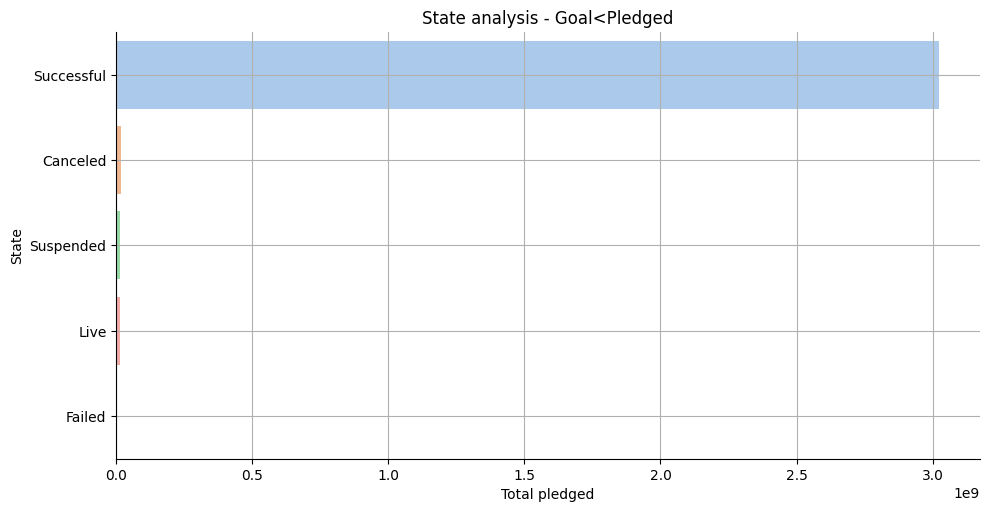

In [42]:
data=pd.DataFrame({'index':df[df["Goal"]<df["Pledged"]].groupby("State")["Pledged"].sum().head(10).sort_values(ascending=False).index,
                    'values':df[df["Goal"]<df["Pledged"]].groupby("State")["Pledged"].sum().head(10).sort_values(ascending=False).values})

sns.catplot(data=data, x=data['values'], y=data['index'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("Total pledged")
plt.ylabel("State")
plt.title("State analysis - Goal<Pledged")
plt.show()

In the opposite case (goal>pledged) there's a higher chance for the game to be cancelled

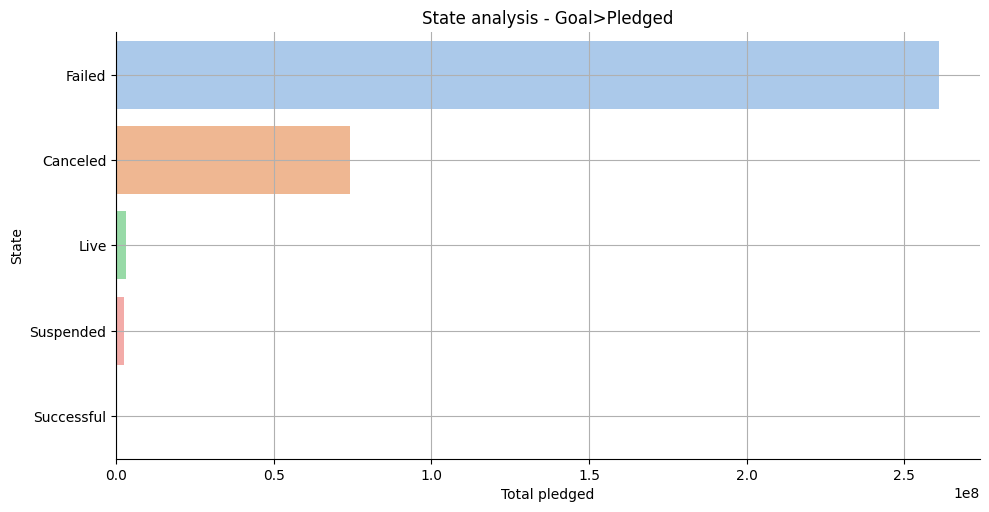

In [43]:
data=pd.DataFrame({'index':df[df["Goal"]>df["Pledged"]].groupby("State")["Pledged"].sum().head(10).sort_values(ascending=False).index,
                    'values':df[df["Goal"]>df["Pledged"]].groupby("State")["Pledged"].sum().head(10).sort_values(ascending=False).values})

sns.catplot(data=data, x=data['values'], y=data['index'], kind="bar", palette="pastel", legend=False,height = 5, aspect = 2)
plt.grid()
plt.xlabel("Total pledged")
plt.ylabel("State")
plt.title("State analysis - Goal>Pledged")
plt.show()

Let's compare the goals with the pledged sums: the graph demonstrates how the goal is not proportional to the pledged sums, it's instead kept low even for the best selling products

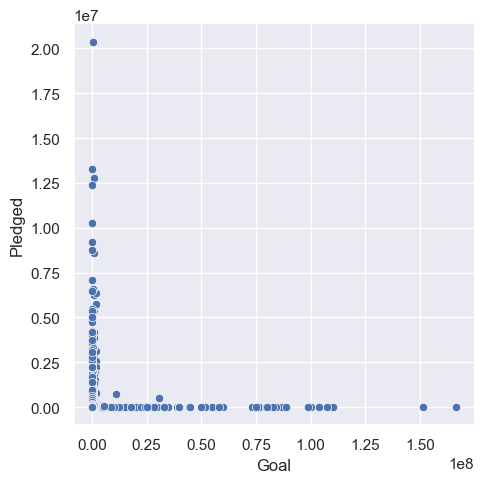

In [41]:
sns.relplot(data=df, x="Goal", y="Pledged")
sns.set_theme(style="darkgrid")